In [6]:
from google.colab import drive
import random
import matplotlib.pyplot as plt
import time
import numpy as np

drive.mount('/content/drive')
random.seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Realizamos dos graficos para medir la complejidad termporal de nuestro algoritmo greedy. Se generaron dos sets de datos y se corre nuestro algoritmo de tal manera que se agrega un video mas en cada iteración.

In [2]:
def obtener_tiempos(path):
    with open(path, "r") as archivo:
        lineas = archivo.readlines()

    tiempos = []
    i = 0

    for linea in lineas:
        if (i == 0):
            i += 1
            continue
        valores = linea.strip().split(',')
        tupla = (int(valores[0]), int(valores[1]))
        tiempos.append(tupla)

    return tiempos

def ordenar_tupla(criterio, tiempos, reverse = False):
    tiempos.sort(key = criterio, reverse = reverse)
    return tiempos

def tiempo_total(tiempos):
    total_scaloni = 0
    tiempos_por_video = []
    for tupla in tiempos:
        total_scaloni += tupla[0]
        tiempos_por_video.append(total_scaloni + tupla[1])
    return max(tiempos_por_video)

def tiempos_a_graficar(tiempos):
  tamaños = []
  duracion = []
  for i, tupla in enumerate(tiempos):
    tamaños.append(i+1)

    inicio = time.time()
    tiempos_aux = tiempos[:i+1]
    tiempos_ordenados = ordenar_tupla(sort_by_ai, tiempos_aux[:i+1], True)
    resultado = tiempo_total(tiempos_ordenados[:i+1])

    fin = time.time()

    print(i)
    duracion.append(fin - inicio)

  return tamaños, duracion


sort_by_ai = lambda x: x[1]

In [3]:
# Obtenemos los .txt
with open('/content/drive/MyDrive/TDA-I-Fiuba/sets/nuestros/set_grafico.txt', 'w') as archivo:
  archivo.write('S_i,A_i\n')
  for i in range(0,50000):
    r1 = random.randint(1, 5000)
    r2 = random.randint(1, 5000)
    archivo.write(str(r1) + ',' + str(r2) + '\n')
tiempos = obtener_tiempos('/content/drive/MyDrive/TDA-I-Fiuba/sets/nuestros/set_grafico.txt')

In [ ]:
tamaños, duracion = tiempos_a_graficar(tiempos)

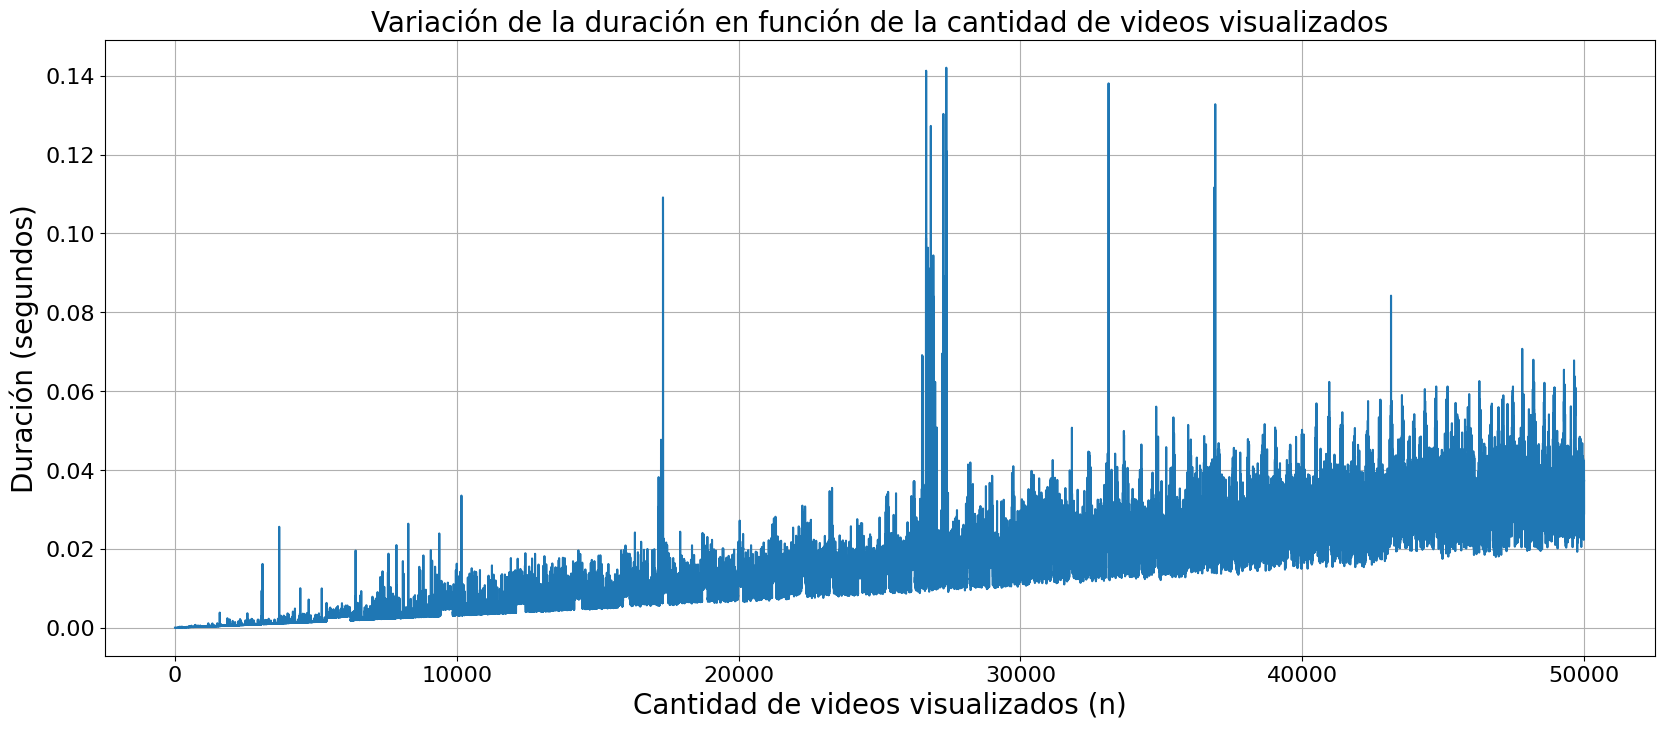

In [ ]:
# Crear el gráfico
plt.figure(figsize=(20, 8))
plt.plot(tamaños, duracion)
plt.xlabel('Cantidad de videos visualizados (n)', fontsize=20)
plt.ylabel('Duración (segundos)', fontsize=20)
plt.title('Variación de la duración en función de la cantidad de videos visualizados', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Mostrar el gráfico
plt.show()

# Probamos peor caso
Tiempos estan ordenados de forma descendente

In [ ]:
tiempos_desordenados = ordenar_tupla(sort_by_ai, tiempos)
tamaños_desordenado, duracion_desordenado = tiempos_a_graficar(tiempos_desordenados)

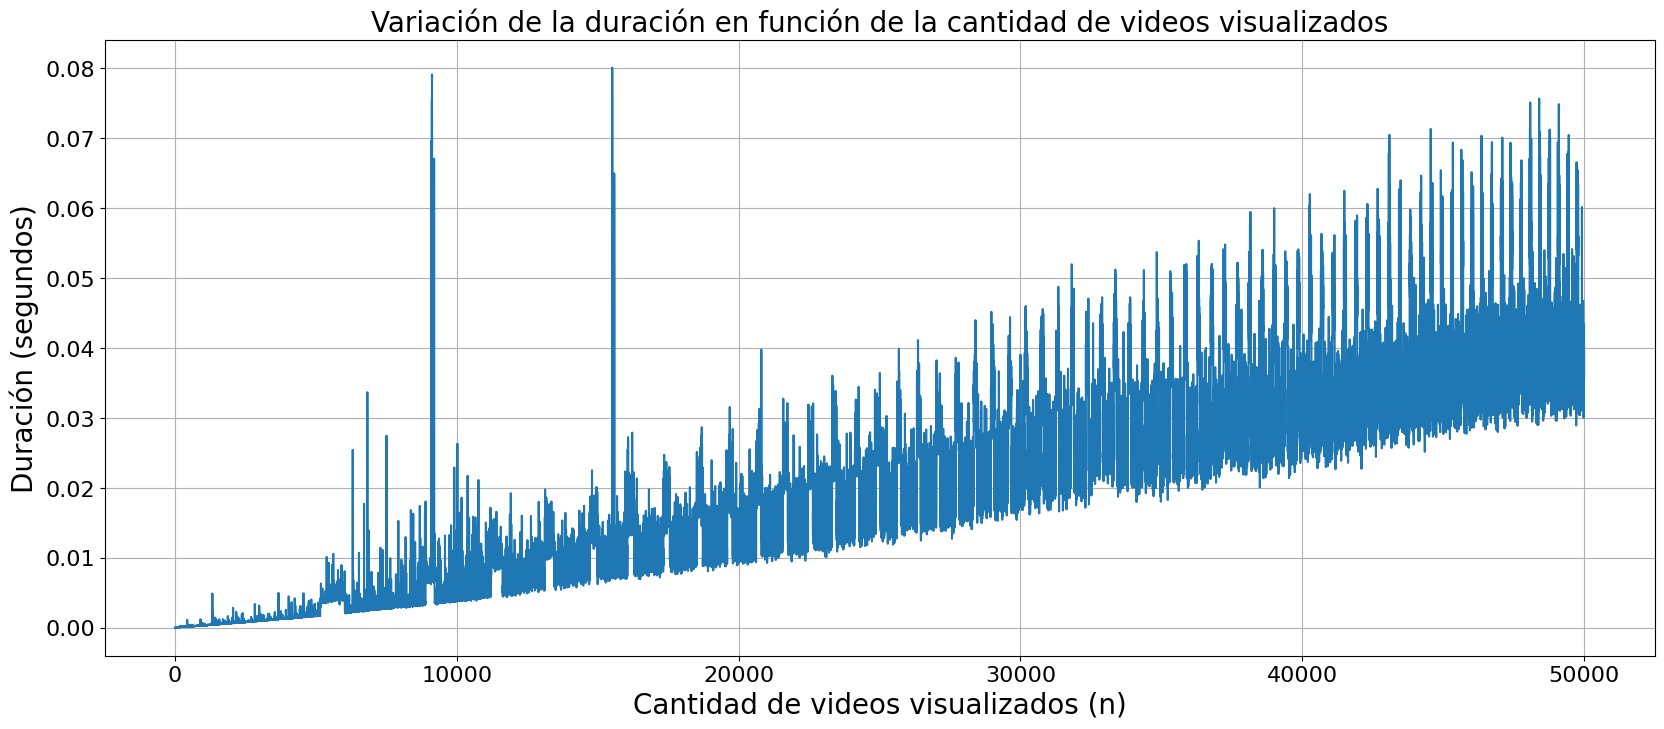

In [10]:
# Crear el gráfico
plt.figure(figsize=(20, 8))
plt.plot(tamaños_desordenado, duracion_desordenado)
plt.xlabel('Cantidad de videos visualizados (n)', fontsize=20)
plt.ylabel('Duración (segundos)', fontsize=20)
plt.title('Variación de la duración en función de la cantidad de videos visualizados', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Mostrar el gráfico
plt.show()

# Comparacion dos sets de datos

In [ ]:
# Creación archivos
with open('/content/drive/MyDrive/TDA-I-Fiuba/sets/nuestros/set_grafico_ayudantes_lentos.txt', 'w') as archivo:
  archivo.write('S_i,A_i\n')
  for i in range(0,20000):
    si = random.randint(1, 10)
    ai = random.randint(200, 300)
    archivo.write(str(si) + ',' + str(ai) + '\n')

with open('/content/drive/MyDrive/TDA-I-Fiuba/sets/nuestros/set_grafico_ayudantes_rapidos.txt', 'w') as archivo:
  archivo.write('S_i,A_i\n')
  for i in range(0,20000):
    si = random.randint(1, 10)
    ai = random.randint(1, 10)
    archivo.write(str(si) + ',' + str(ai) + '\n')


In [ ]:
tiempos4 = obtener_tiempos('/content/drive/MyDrive/TDA-I-Fiuba/sets/nuestros/set_grafico_ayudantes_lentos.txt')
tamaños4, duracion4 = tiempos_a_graficar(tiempos4)

tiempos5 = obtener_tiempos('/content/drive/MyDrive/TDA-I-Fiuba/sets/nuestros/set_grafico_ayudantes_rapidos.txt')
tamaños5, duracion5 = tiempos_a_graficar(tiempos5)

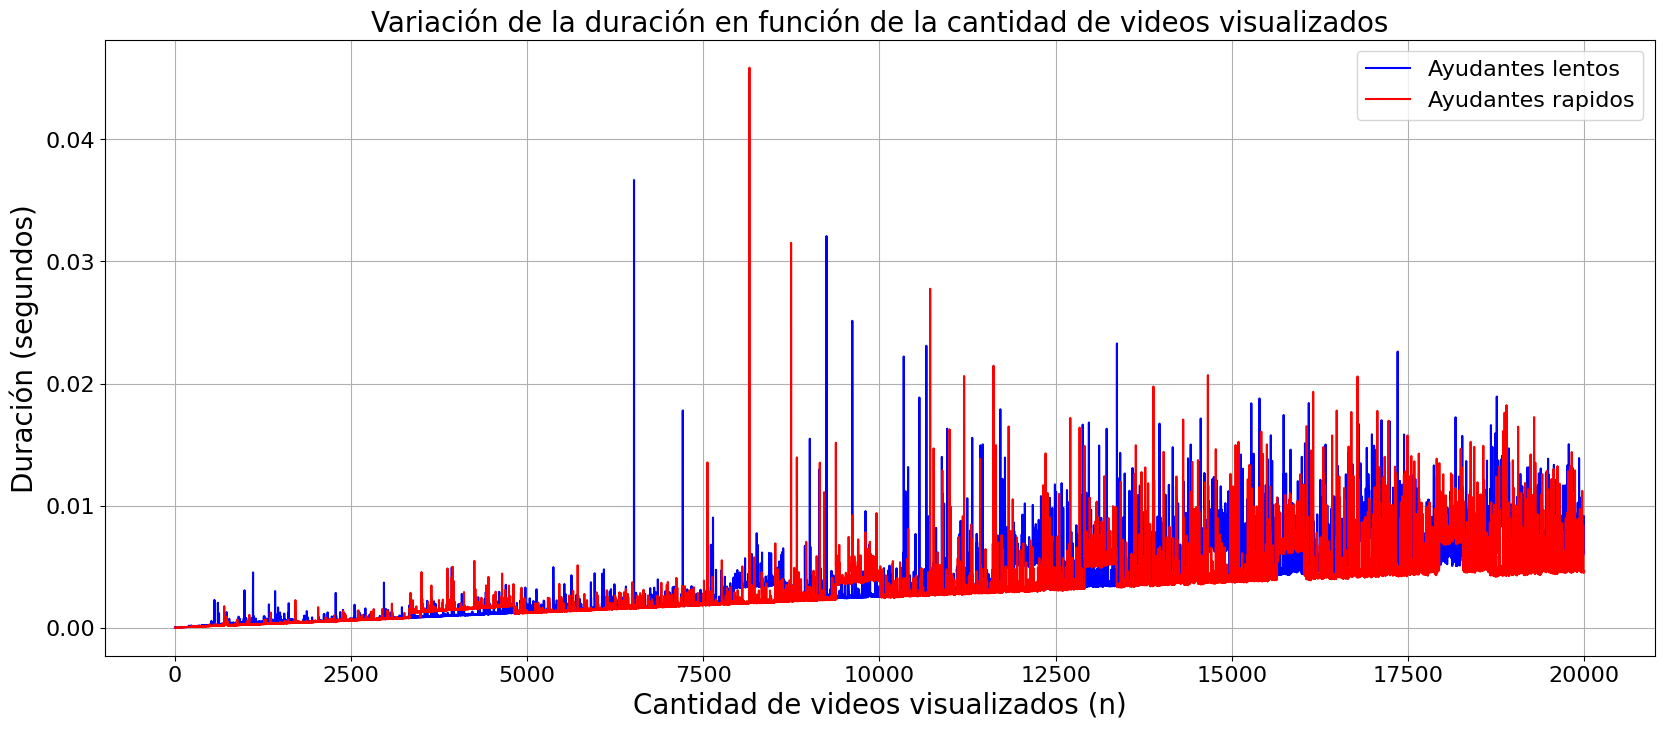

In [ ]:
plt.figure(figsize=(20, 8))
# Crear el primer gráfico
plt.plot(tamaños4, duracion4, color='blue', label='Ayudantes lentos')
# Crear el segundo gráfico y superponerlo en el primero
plt.plot(tamaños5, duracion5, color='red', label='Ayudantes rapidos')

plt.xlabel('Cantidad de videos visualizados (n)', fontsize=20)
plt.ylabel('Duración (segundos)', fontsize=20)
plt.title('Variación de la duración en función de la cantidad de videos visualizados', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.grid(True)
plt.show()
